In [ ]:
'''
Assignment Overview

You will have to work with two primary datasets:
1. Bitcoin Market Sentiment Dataset
o Columns: Date, Classification (Fear/Greed
2. Historical Trader Data from Hyperliquid
o Columns include: account, symbol, execution price, size, side, time, 
start position, event, closedPnL, leverage, etc.
Your objective is to explore the relationship between trader performance and market 
sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading 
strategies.

Link to dataset
Historical Data:
https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing

Fear Greed Index link:
https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing
'''

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fear_greed_df  = pd.read_csv(r"C:\Users\admin\Downloads\fear_greed_index.csv")
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.date

In [5]:
fear_greed_df.shape

(2644, 4)

In [6]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [7]:
fear_greed_df['value'].describe()

count    2644.000000
mean       46.981089
std        21.827680
min         5.000000
25%        28.000000
50%        46.000000
75%        66.000000
max        95.000000
Name: value, dtype: float64

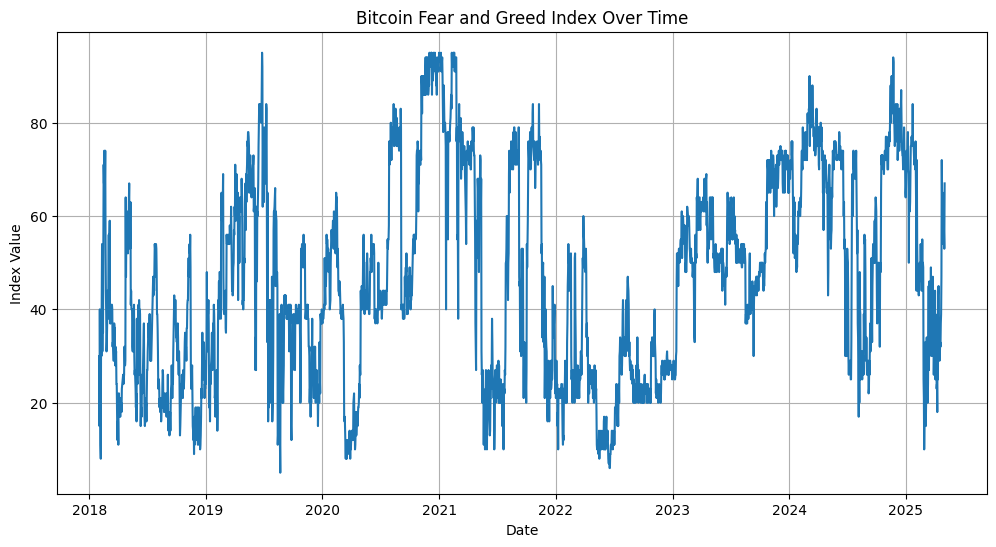

In [8]:
plt.figure(figsize=(12,6))
plt.plot(fear_greed_df['date'], fear_greed_df['value'])
plt.title('Bitcoin Fear and Greed Index Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.grid()
plt.show()

In [9]:
df_trades  = pd.read_csv(r"C:\Users\admin\Downloads\historical_data.csv")
df_trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
df_trades.shape

(211224, 16)

In [11]:
df_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [12]:
# Converting 'Timestamp IST' to datetime, then extracting only date
df_trades['Date'] = pd.to_datetime(df_trades['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.date

In [13]:
# Calculating daily performance metrics
daily_performance = df_trades.groupby('Date').agg({
    'Closed PnL': ['mean', 'median', 'sum'],
    'Account': 'nunique'  # Count of unique traders
})
daily_performance.head()

Closed PnL                        Account
                 mean     median         sum nunique
Date                                                
2023-05-01   0.000000   0.000000    0.000000       1
2023-12-05   0.000000   0.000000    0.000000       1
2023-12-14 -18.675885   0.000000 -205.434737       1
2023-12-15 -12.316017 -12.316017  -24.632034       1
2023-12-16   0.000000   0.000000    0.000000       1

In [14]:
df_merged = pd.merge(
    df_trades,
    fear_greed_df[['date', 'classification']],
    left_on='Date',
    right_on='date',
    how='left'
)

In [15]:
df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,Extreme Greed


In [16]:
df_merged.shape

(211224, 19)

In [17]:
# Cleaning up: removing the redundant 'date' column
df_merged.drop(columns=['date'], inplace=True)

In [18]:
df_merged.shape

(211224, 18)

In [19]:
# Keeping only trades with known sentiment (Fear or Greed)
df_merged = df_merged[df_merged['classification'].notnull()]

In [20]:
df_merged.shape

(211218, 18)

In [21]:
# How many trades on Fear vs. Greed days?
print(df_merged['classification'].value_counts())

classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [22]:
# Do traders earn more on Fear days or Greed days?
# Average PnL by sentiment
avg_pnl_by_sentiment = df_merged.groupby('classification')['Closed PnL'].mean().sort_values()
print(avg_pnl_by_sentiment)

classification
Neutral          34.307718
Extreme Fear     34.537862
Greed            42.743559
Fear             54.290400
Extreme Greed    67.892861
Name: Closed PnL, dtype: float64


In [ ]:
''' INSIGHTS
# Do traders earn more on Fear days or Greed days?

Traders make the most profit during "Extreme Greed". This suggests they’re able to ride the momentum or time the market 
well when others are confident and Surprisingly, Fear (not Greed) comes next. This could indicate that smart traders are 
capitalizing on overreactions or price volatility during fear periods. Extreme Fear has the lowest avg. PnL among non-neutral 
sentiments, supporting the common belief that markets are more difficult or riskier during panic periods. Neutral sentiment has 
the lowest profitability overall, possibly because there’s less market movement or opportunity.
'''

                     mean  median  count
classification                          
Extreme Fear    34.537862     0.0  21400
Extreme Greed   67.892861     0.0  39992
Fear            54.290400     0.0  61837
Greed           42.743559     0.0  50303
Neutral         34.307718     0.0  37686


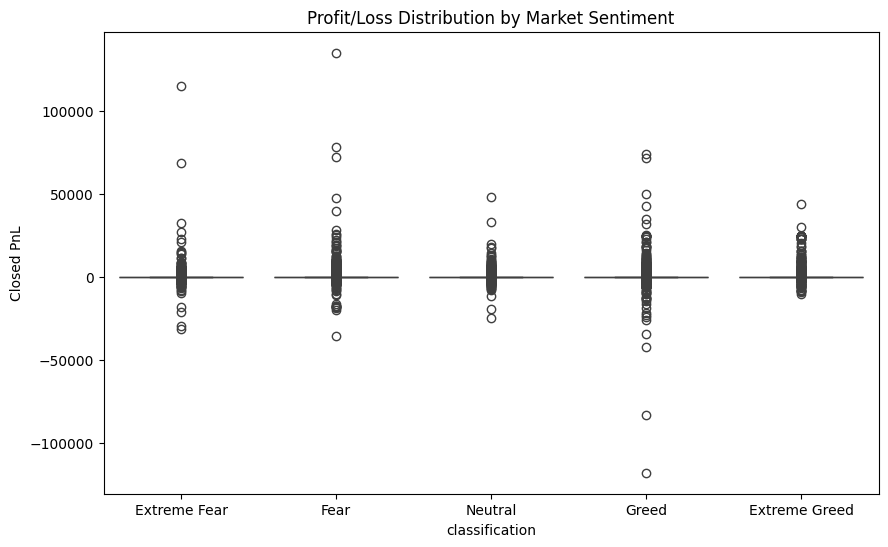

In [24]:
pnl_by_sentiment = df_merged.groupby('classification')['Closed PnL'].agg(['mean', 'median', 'count'])
print(pnl_by_sentiment)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=df_merged, order=["Extreme Fear", "Fear", "Neutral", "Greed", "Extreme Greed"])
plt.title('Profit/Loss Distribution by Market Sentiment')
plt.show()

In [ ]:
''' INSIGHTS
While Extreme Greed markets show the highest average profitability, the median PnL of 0.0 indicates that most traders
break even or lose money, with a few outliers driving the mean up. Fear markets offer more consistent opportunities, while 
Extreme Fear and Neutral phases yield the lowest returns. Traders should be wary of overexposure in Extreme Greed due to high risk.
'''

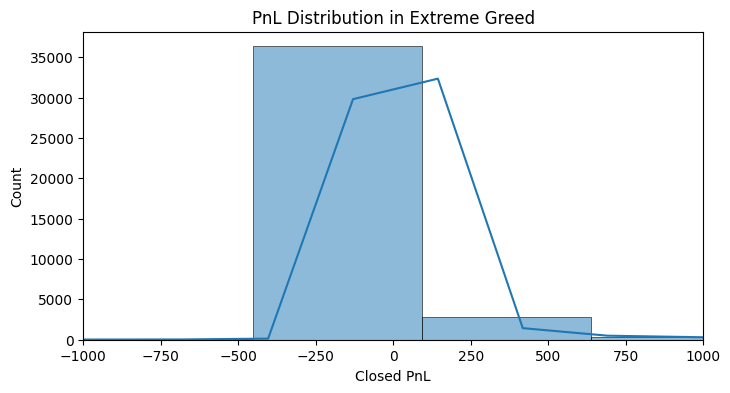

In [26]:
# Plot PnL distribution for Extreme Greed (where mean is highest)
plt.figure(figsize=(8, 4))
sns.histplot(df_merged[df_merged['classification'] == 'Extreme Greed']['Closed PnL'], bins=100, kde=True)
plt.xlim(-1000, 1000)
plt.title('PnL Distribution in Extreme Greed')
plt.show()

In [27]:
# Number of trades by sentiment
trade_counts = df_merged['classification'].value_counts()

# Total USD volume traded by sentiment
volume_by_sentiment = df_merged.groupby('classification')['Size USD'].sum().sort_values(ascending=False)

print("Number of Trades by Sentiment:\n", trade_counts)
print("\nTotal USD Volume Traded by Sentiment:\n", volume_by_sentiment)


Number of Trades by Sentiment:
 classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

Total USD Volume Traded by Sentiment:
 classification
Fear             4.833248e+08
Greed            2.885825e+08
Neutral          1.802421e+08
Extreme Greed    1.244652e+08
Extreme Fear     1.144843e+08
Name: Size USD, dtype: float64


In [ ]:
''' INSIGHTS
Most Active Period:
Traders are most active during Fear, both in terms of number of trades and total volume.
This could reflect cautious repositioning, stop-loss triggering, or dip-buying.
Extreme Fear is Quiet:
Extreme Fear has lowest activity, possibly due to trader hesitation or sitting out due to uncertainty.
Greed vs. Extreme Greed:
Activity drops in Extreme Greed, suggesting that traders may be taking profits or avoiding perceived market tops.

Trader activity (both number and volume of trades) peaks during Fear and drops in Extreme Fear — suggesting that 
moderate fear triggers trading while extreme panic results in hesitation
'''

In [29]:
# Do Traders Use Higher Leverage in Greed/Extreme Greed Markets?
# Approximate leverage: (Start Position + Trade Size) / Trade Size
df_merged['Approx Leverage'] = (df_merged['Start Position'] + df_merged['Size Tokens']) / df_merged['Size Tokens']

# Group by sentiment classification
avg_leverage_by_sentiment = df_merged.groupby('classification')['Approx Leverage'].mean()

print("Average Leverage by Sentiment:")
print(avg_leverage_by_sentiment)


Average Leverage by Sentiment:
classification
Extreme Fear     2863.475101
Extreme Greed    2143.630033
Fear             5015.655067
Greed            1165.515898
Neutral          4670.386531
Name: Approx Leverage, dtype: float64


In [ ]:
'''
Do Traders Use Higher Leverage in Greed/Extreme Greed Markets?

Traders actually used much higher leverage in Fear and Neutral markets, not during Greed or Extreme Greed.
Lowest leverage is seen during Greed, possibly indicating traders feel safer and thus take smaller leveraged risks.
This contradicts the assumption that traders go "all in" during bullish sentiment (Greed).

Contrary to popular belief, traders use the highest leverage during Fear and Neutral markets—possibly to compensate for 
lower confidence or smaller price movements. In Greed phases, they tend to reduce leverage.
'''

In [31]:
# Is There a Time Lag Effect?
df_merged['Sentiment_Prior_Day'] = df_merged['classification'].shift(1)

# Droping rows where sentiment is NaN (usually the first row or mismatches)
df_lagged = df_merged.dropna(subset=['Sentiment_Prior_Day'])

lagged_pnl_by_sentiment = df_lagged.groupby('Sentiment_Prior_Day')['Closed PnL'].mean()
print("Average Closed PnL for Trades Based on Previous Day's Sentiment:\n", lagged_pnl_by_sentiment)

Average Closed PnL for Trades Based on Previous Day's Sentiment:
 Sentiment_Prior_Day
Extreme Fear     28.612387
Extreme Greed    67.858061
Fear             56.134161
Greed            42.765665
Neutral          34.655726
Name: Closed PnL, dtype: float64


In [ ]:
'''
Is There a Time Lag Effect?

Extreme Greed → Highest Next-Day Profits: Traders tend to make the most money the day after an Extreme Greed sentiment. This 
could mean the market remains bullish for a bit longer, allowing trades placed early the next day to capitalize.
Extreme Fear → Lowest Next-Day Profits: Conversely, traders perform the worst the day after an Extreme Fear day. This may 
indicate high volatility, panic-driven trades, or poor entries following fearful conditions.

Monitoring sentiment one day prior can guide trade planning: high-profit trades are more likely the day after Extreme Greed, 
while the day after Extreme Fear may warrant caution or hedging strategies.
'''

In [33]:
# Do Traders Perform Better During Sentiment Transitions?

df_merged_sorted = df_merged.sort_values(by='Date')
df_merged_sorted['Prev_Classification'] = df_merged_sorted['classification'].shift(1)
df_merged_sorted['Sentiment_Transition'] = (
    df_merged_sorted['Prev_Classification'].fillna('None') + ' → ' + df_merged_sorted['classification']
)
avg_pnl_by_transition = df_merged_sorted.groupby('Sentiment_Transition')['Closed PnL'].mean().sort_values(ascending=False)
print("Average Closed PnL by Sentiment Transition:\n", avg_pnl_by_transition)

Average Closed PnL by Sentiment Transition:
 Sentiment_Transition
Fear → Extreme Fear              663.055008
Greed → Fear                     232.094850
Neutral → Fear                    86.281075
Extreme Greed → Greed             71.898590
Extreme Greed → Extreme Greed     67.913148
Fear → Fear                       54.278716
Neutral → Greed                   50.880065
Greed → Greed                     42.729599
Extreme Fear → Extreme Fear       34.332205
Neutral → Neutral                 34.326847
Greed → Extreme Greed             34.108482
Extreme Fear → Fear               30.085215
Fear → Neutral                    24.078939
Greed → Neutral                    3.663164
Fear → Greed                       0.000000
None → Greed                       0.000000
Extreme Fear → Neutral           -11.547430
Name: Closed PnL, dtype: float64


In [ ]:
'''
# Do Traders Perform Better During Sentiment Transitions?

Traders perform best when sentiment deteriorates into Extreme Fear.
Returns are flat or even negative when sentiment tries to "recover."

Trader profitability peaks when sentiment shifts into Extreme Fear, suggesting traders who capitalize on panic conditions
tend to outperform. In contrast, sentiment recovery phases (e.g., Extreme Fear → Neutral) often lead to underperformance, indicating
a lag between improving sentiment and actual profitable opportunities.
'''

In [35]:
# Which Group of Traders (Small vs. Large Accounts) Is Most Affected by Sentiment?
account_volume = df_merged.groupby('Account')['Size USD'].sum()  # 1. Total traded volume by account

volume_quantiles = account_volume.quantile([0.33, 0.66])  # 2. Classify accounts into size groups using quantiles
def classify_account_size(volume):
    if volume <= volume_quantiles[0.33]:
        return 'Small'
    elif volume <= volume_quantiles[0.66]:
        return 'Medium'
    else:
        return 'Large'

account_size_map = account_volume.apply(classify_account_size)  # 3. Map size category to each trade
df_merged['Account Size'] = df_merged['Account'].map(account_size_map)

pnl_by_size_sentiment = df_merged.groupby(['classification', 'Account Size'])['Closed PnL'].mean().unstack()
print("Average Closed PnL by Account Size & Sentiment:\n", pnl_by_size_sentiment)

Average Closed PnL by Account Size & Sentiment:
 Account Size         Large     Medium       Small
classification                                   
Extreme Fear     42.416508 -11.312745   67.442192
Extreme Greed   117.358431  20.681472   90.343138
Fear             62.533747  15.482486   77.632592
Greed            59.236031  15.023090   76.446718
Neutral          43.646368   9.059493  128.162432


In [ ]:
'''
Which Group of Traders (Small vs. Large Accounts) Is Most Affected by Sentiment?

1.Small traders consistently earn more Closed PnL than medium and large accounts across all sentiments.Especially in Neutral markets,
small traders dominate.
2.Medium-sized accounts struggle the most. Their PnL is lowest in every sentiment condition. They even lose money in Extreme Fear.
3.Large accounts perform very well in Extreme Greed (PnL = 117.36). They may be using better strategies or risk management in
bullish conditions.


Small traders outperform larger accounts in most market conditions, especially Neutral sentiment, possibly due to agility and 
low exposure. Large accounts thrive during Extreme Greed. Medium accounts show inconsistent results and higher risk, particularly
in fearful markets.
'''

In [37]:
# What’s the Optimal Leverage to Use in Each Sentiment Phase?
# Defining leverage bins
leverage_bins = [0, 2, 5, 10, 25, 50, 100, df_merged['Approx Leverage'].max()]
leverage_labels = ['0-2x', '2-5x', '5-10x', '10-25x', '25-50x', '50-100x', '100x+']

df_merged['Leverage Bin'] = pd.cut(df_merged['Approx Leverage'], bins=leverage_bins, labels=leverage_labels)

leverage_sentiment_analysis = df_merged.groupby(['classification', 'Leverage Bin'])['Closed PnL'].mean().unstack()
leverage_sentiment_analysis

C:\Users\admin\AppData\Local\Temp\ipykernel_18372\1820092826.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  leverage_sentiment_analysis = df_merged.groupby(['classification', 'Leverage Bin'])['Closed PnL'].mean().unstack()


Leverage Bin,0-2x,2-5x,5-10x,10-25x,25-50x,50-100x,100x+
classification,,,,,,,
Extreme Fear,7.047899,82.154712,43.086784,60.871977,28.023840,26.208119,10.027071
Extreme Greed,24.758525,103.790442,89.032203,66.277735,107.941811,333.219772,70.839273
Fear,21.934960,145.292256,76.795868,73.310548,43.296766,23.863118,14.431258
Greed,28.064532,95.394011,43.997256,52.039815,59.410371,154.595541,31.401747
Neutral,16.384942,72.882586,64.730205,54.665314,31.981930,27.422762,11.670988


In [ ]:
'''
What’s the Optimal Leverage to Use in Each Sentiment Phase?

1.In Extreme Fear markets, moderate leverage (2–5x) is most profitable. Conservative risk pays off.
2.During Extreme Greed, traders using very high leverage (50–100x) perform best. Likely due to aggressive positions in
strong uptrends.
3.In Fear phases, moderate leverage (2–5x) again leads to highest profits.
4.Like in Extreme Greed, aggressive leverage seems to outperform.
5.In neutral phases, again 2–5x is the sweet spot.
'''

In [ ]:
''' FINAL Insights

This analysis reveals that market sentiment profoundly impacts trader performance, but not always as expected. While 
Extreme Greed offers the highest rewards, it comes with extreme risk. Fear phases provide consistency, and Neutral markets are
best avoided. Leverage, account size, and timing further refine these insights into actionable strategies.
'''